# Question proposing & Answering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import folium

## 1. Các khung giờ, các ngày trong tuần thường xảy ra nhiều và ít vụ án nhất?
**- Mục đích:** 

   + Nhằm phục vụ cho công tác khoanh vùng và dự đoán về thời gian xảy ra vụ án. Từ đó, các lực lượng chức năng sẽ có kế hoạch tăng cường canh gác, tuần tra vào những thời điểm có nguy cơ cao. 
   + Người dân dựa vào đó để phòng tránh cho bản thân mình.
    
**- Cách thực hiện:** 

   + Dựa vào cột `Date`, ta sẽ thống kê các ngày trong tuần theo các khung giờ và lưu vào dataframe `df_time`.
   + Cuối cùng, ta sẽ tìm max, min giá trị của các hàng và cột của `df_time` để có câu trả lời. Bên cạnh đó, `df_time` sẽ được trực quan hóa bằng heatmap, dựa vào đó ta có thể kiểm tra lại kết quả và đưa ra những đánh giá khác. 

In [2]:
# Đọc file Cleaned_Crimes.csv và lưu vào DataFrame
df = pd.read_csv('Cleaned_Crimes.csv')
df['Date'] = pd.to_datetime(df['Date'])

matrix_ = []
for i in range(7):
    matrix_.append([0]*24)
    
for day_data in df['Date']:
    day = day_data.weekday()
    hour = day_data.hour
    matrix_[day][hour] += 1 

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_time = pd.DataFrame(matrix_, index=day_of_week)
df_time

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Mon,29,6,13,11,10,6,7,14,19,22,...,12,21,29,18,19,20,13,19,20,13
Tue,38,8,7,10,10,6,3,10,18,19,...,17,30,16,20,28,28,30,24,16,17
Wed,29,11,9,7,4,4,6,13,10,19,...,20,23,22,28,23,22,15,14,18,14
Thu,17,13,7,6,8,9,17,15,14,18,...,24,30,24,26,14,25,20,18,22,14
Fri,34,11,10,3,3,10,10,22,19,25,...,17,20,20,21,17,23,21,18,20,21
Sat,33,12,15,12,16,8,9,9,14,13,...,32,20,21,22,19,24,21,16,19,26
Sun,39,14,16,14,17,11,8,12,9,18,...,17,15,15,25,26,25,29,20,16,21


In [3]:
# Tìm min
min_value_index = df_time.stack().idxmin()
min_day = min_value_index[0]  # Ngày có ít vụ án xảy ra nhất
min_hour = min_value_index[1] # Giờ có ít vụ án xảy ra nhất

# Tìm max 
max_value_index = df_time.stack().idxmax()
max_day = max_value_index[0]  # Ngày có nhiều vụ án xảy ra nhất
max_hour = max_value_index[1] # Giờ có nhiều vụ án xảy ra nhất

print(f"- Ngày có nhiều vụ án xảy ra nhất: {max_day}")
print(f"- Giờ có nhiều vụ án xảy ra nhất: {max_hour}")
print(f"- Ngày có ít vụ án xảy ra nhất: {min_day}")
print(f"- Giờ có ít vụ án xảy ra nhất: {min_hour}")

- Ngày có nhiều vụ án xảy ra nhất: Sun
- Giờ có nhiều vụ án xảy ra nhất: 0
- Ngày có ít vụ án xảy ra nhất: Tue
- Giờ có ít vụ án xảy ra nhất: 6


Text(0.5, 1.0, 'Thống kê các vụ án tại các khung giờ của các ngày trong tuần')

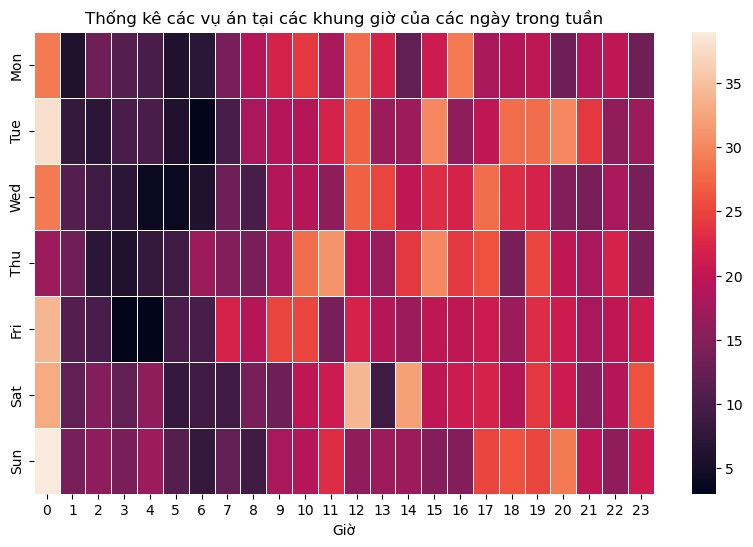

In [4]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df_time, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Giờ')
ax.set_title('Thống kê các vụ án tại các khung giờ của các ngày trong tuần')

- Dựa vào heatmap, ta đã có cái nhìn cụ thể hơn về kết quả phía trên.
- Các khung giờ từ `1h đến 8h` sẽ có ít nguy cơ xảy ra vụ án nhất.
- Các khung giờ từ `11h đến 23h` sẽ có nguy cơ cao xảy ra các vụ án và `0h` là khung giờ có nguy cơ cao nhất, vì thế mọi người cần cẩn thận và chú ý khung giờ này.